# EDA (Exploratory Data Analysis)

¿Qué hay que hacer en el EDA?
* Target I: identificar si tenemos un problema de regresión o clasificación.
* Target II: que tipo de datos tiene el target, tiene missings, etc...
* Target III: pintar el target para ver que pinta tiene. ¿Esta desbalanceado?

## Leemos los datos de ejemplo

In [1]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

In [2]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])
boston_df = pd.DataFrame(load_boston()["data"],columns=load_boston()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]
boston_df["target"] = load_boston()["target"]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep="\t")

In [6]:
boston_df.to_csv("boston.csv", sep=";", index=False)
len(boston_df)

506

### Informacion basica del Dataset

In [36]:
# Columnas y filas
print('Numero de filas: ' + str(len(iris_df)))
print('Numero de columnas: ' + str(len(iris_df.columns)))

Numero de filas: 150
Numero de columnas: 5


In [128]:
# Muy importantes los tipos de los datos:
    # Numericos
    # Texto
    # Fecha
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Analisis rapido de los datos

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [120]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# El describe nos elimina todo lo que no sea numerico. 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
# Si tenemos alguna categorica en el dataset, usamos esto
iris_df["target"].describe()

count            150
unique             3
top       versicolor
freq              50
Name: target, dtype: object

In [63]:
# RENOMBRAR COLUMNAS. Vamos a poner nombres coherentes a las columnas, que no sean muy largos y a ser posible que no tengan
# catacteres raros, ni espacios.

# Renombramos. NO sobreescribimos dataset
iris_df.rename(columns={"sepal length (cm)": "sepal length",
                                  "sepal width (cm)": "sepal width",
                                  "petal length (cm)": "petal length",
                                  "petal width (cm)": "petal width"})
print(iris_df.columns)
# Esto resulta util para quitar prefijos o sufijos. NO esta sobreescribiendo el dataset
iris_df.columns.str.replace('length','')

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


Index(['sepal  (cm)', 'sepal width (cm)', 'petal  (cm)', 'petal width (cm)',
       'target'],
      dtype='object')

En este punto ya tenemos que tener comprobado los siguiente:
* Target identificado
* Los datos estan correctamente cargados, no faltan filas
* No tenemos columnas vacias
* No tenemos columnas constantes

## Target

Primero, identificar de que tipo es el target:
* IRIS: clasificacion
* BOSTON: regresion

### Estadisticos basios del Target

In [41]:
# CLASIFICACION. Ver un conteo de categorias seria interesante
print(iris_df["target"].value_counts())
print(iris_df["target"].value_counts(normalize=True, dropna=False))
print("Valores unicos de dataset: " + str(len(iris_df["target"].unique())))

# Lo vemos en valor absoluto, y en valor relativo. El dropna=False sirve para que nos muestre tambien si hay missings

versicolor    50
setosa        50
virginica     50
Name: target, dtype: int64
versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: target, dtype: float64
Valores unicos de dataset: 3


In [27]:
# REGRESION
boston_df['target'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

### Pintamos el target

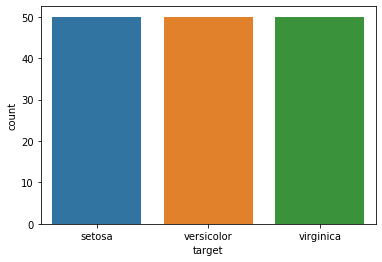

In [28]:
# CLASIFICACION. Aqui es importante ver si el dataset esta balanceado. Como vemos aqui, mas balanceado no puede estar.
sns.countplot(x="target", data=iris_df)

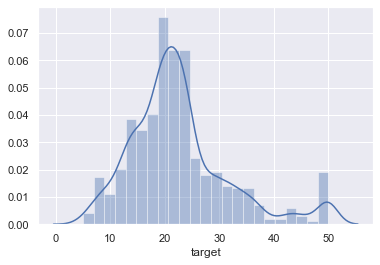

In [33]:
# REGRESION
sns.distplot(boston_df["target"])

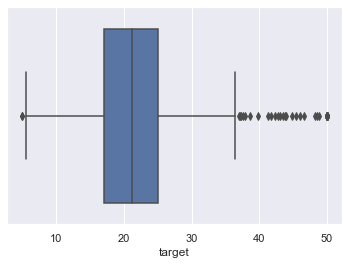

In [42]:
# REGRESION. Un boxplot tb es interesante para ver la distribucion y outliers de la variable
sns.boxplot(x='target', data=boston_df)

# Missings

Es importante tratar todos los missigngs puesto que hay algunos modelos que no son tolerantes a valores faltantes. ¿Qué podemos hacer cuando tenemos missings?
* Lo primero, si son muchos, podemos eliminar la feature. a partir de 15% empieza a ser bastante
* Si son pocos y viendo los casos, no tiene sentido imputar missings, los podemos eliminar
* Imputar media
* Imputar mediana
* Interpolar. Tiene en cuenta el valor anterior y el siguiente. Esto tiene sentido para series temporales
* Montar un modelo

In [68]:
# Veamos cuantos nulos tenemos en los datasets
print("IRIS_DATASET\n", iris_df.isnull().sum(), "\n")
print("BOSTON DATASET\n", boston_df.isnull().sum())

IRIS_DATASET
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 

BOSTON DATASET
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [47]:
# ELIMINAR COLUMNAS. Esto elimina columnas, pero no sobreescribe el dataframe
boston_df.drop(['CRIM', 'ZN', 'INDUS'], axis=1)

,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [64]:
# ELIMINAR FILAS. NO sobreescribimos dataset en ninguno
# Eliminamos las filas si encuentra missing en cualquier columna del dataset
iris_df.dropna()

# Elimina las filas donde todos sus elementos sean missing
iris_df.dropna(how='all')

# Elimina filas si encuentra missings en las siguientes columnas
iris_df.dropna(subset=['sepal length (cm)', 'sepal width (cm)'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [76]:
# Guia muy completa para imputar missings
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

# IMPUTAR OCN UN VALOR
iris_df['sepal length (cm)'] = iris_df['sepal length (cm)'].fillna(0)
iris_df['target'] = iris_df['target'].fillna('setosa')

# IMPUTAR MEDIA O MEDIANA
iris_df['sepal length (cm)'] = iris_df['sepal length (cm)'].fillna(iris_df['sepal length (cm)'].mean())
iris_df['sepal length (cm)'] = iris_df['sepal length (cm)'].fillna(iris_df['sepal length (cm)'].median())

In [77]:
# INTERPOLAR VARLORES. Tiene sentido si es una serie temporal. Coge el valor siguiente y el anterior y hace una media
iris_df['sepal length (cm)'] = iris_df['sepal length (cm)'].interpolate()

# Analisis de variables

Para la deteccion de outliers lo mejor es pintar los datos mediante scatter plots, boxplots e histogramas

Análisis univariante:
* Variables continuas: Funcion de densidad y boxplots
* Variables discretas: Histograma

Análisis bivariante:
* Lo suyo es pintar un grid de scatter plots, para ver las relaciones entre todas las variables
* Discreta vs Discreta:
* Discreta vs Continua: boxplot
* Continua vs Continua: scatter plot

## Analisis univariante

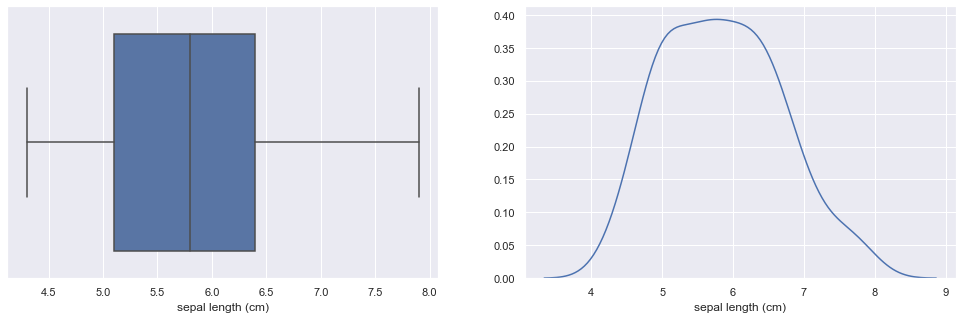

In [108]:
# CONTINUA
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17,5))
sns.boxplot(x="sepal length (cm)", data=iris_df, ax=ax1)
sns.distplot(iris_df["sepal length (cm)"], hist=False, ax=ax2)

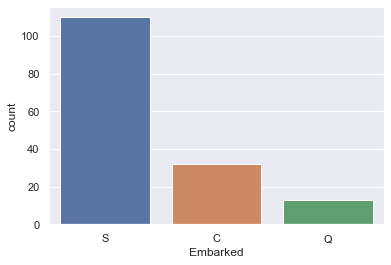

In [121]:
# DISCRETA
sns.countplot(x="Embarked", data=titanic_df)

## Analisis bivariante

In [123]:
# DISCRETA VS DISCRETA
# Una tabla de contingencias es muy adecuado
pd.crosstab(titanic_df["Embarked"], titanic_df["Sex"], margins = False) 

Sex,female,male
Embarked,,
C,11,21
Q,7,6
S,37,73


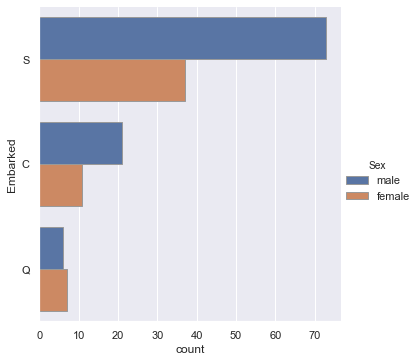

In [138]:
# DISCRETA VS DISCRETA
sns.catplot(y="Embarked", hue="Sex", kind="count", edgecolor=".6", orient = "H",
            data=titanic_df)

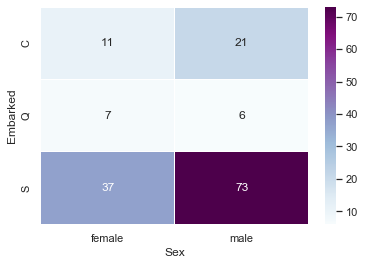

In [156]:
# DISCRETA VS DISCRETA
a = pd.crosstab(titanic_df["Embarked"], titanic_df["Sex"], margins = False)
sns.heatmap(a, cmap="BuPu", linewidths=.3, annot=True)

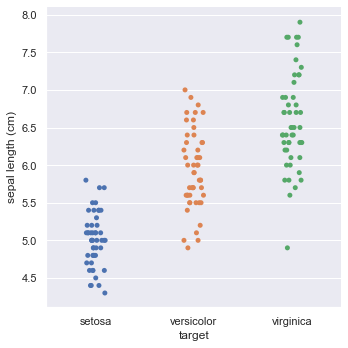

In [6]:
# DISCRETA VS CONTINUA
sns.catplot(x="target", y="sepal length (cm)", data=iris_df)

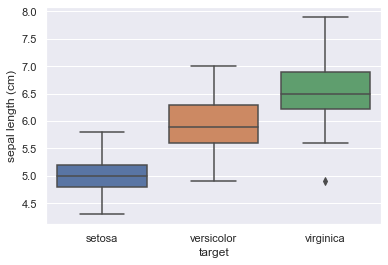

In [7]:
# DISCRETA VS CONTINUA
sns.boxplot(x="target", y="sepal length (cm)", data=iris_df);

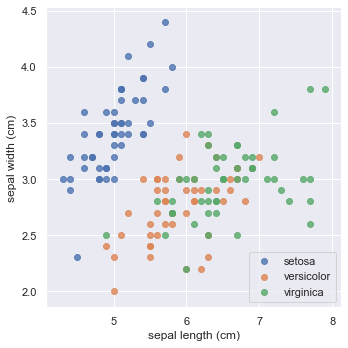

In [12]:
# CONTINUA VS CONTINUA
sns.lmplot( x="sepal length (cm)", y="sepal width (cm)", data=iris_df, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')

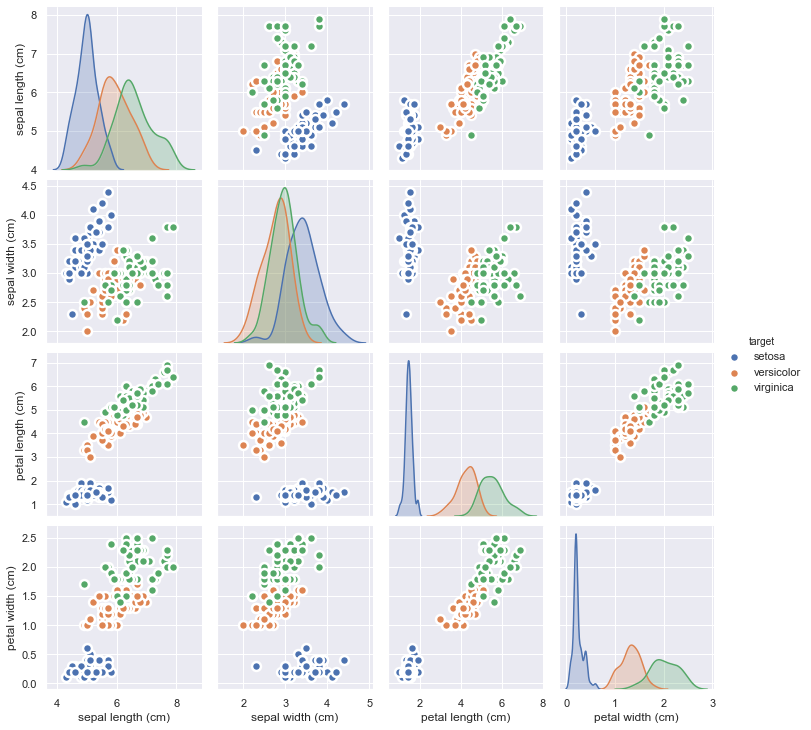

In [17]:
# Grid de variables numericas
sns.pairplot(iris_df, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

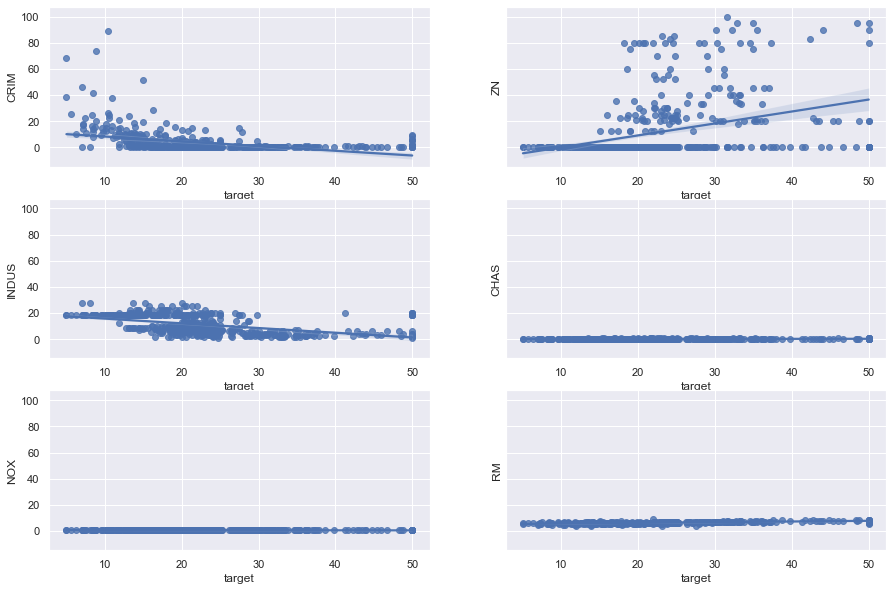

In [43]:
# Grid de muchas variables numericas. ESTO NO TIENE MUCHO SENTIDO
#sns.pairplot(boston_df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

fig, axes = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(15,10))
sns.regplot(boston_df["target"], boston_df["CRIM"], ax=axes[0,0])
sns.regplot(boston_df["target"], boston_df["ZN"], ax=axes[0,1])
sns.regplot(boston_df["target"], boston_df["INDUS"], ax=axes[1,0])
sns.regplot(boston_df["target"], boston_df["CHAS"], ax=axes[1,1])
sns.regplot(boston_df["target"], boston_df["NOX"], ax=axes[2,0])
sns.regplot(boston_df["target"], boston_df["RM"], ax=axes[2,1])

# Outliers

Con todas ls graficas vistas anteriormente, ya deberiamos ser capaces de eliminar los outliers

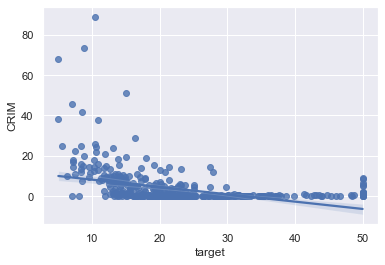

In [45]:
# Vamos a quitar algun outlier de aqui
sns.regplot(boston_df["target"], boston_df["CRIM"])

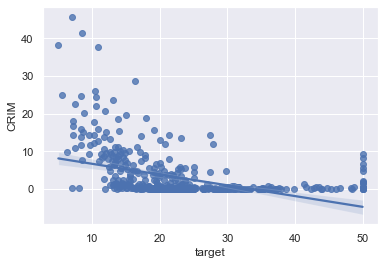

In [46]:
# Simplemente filtramos los datos que consideremos outlier
aa = boston_df.copy()
aa["CRIM"] = aa[aa["CRIM"] < 50]
sns.regplot(aa["target"], aa["CRIM"])

# Matriz de correlacion

In [47]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


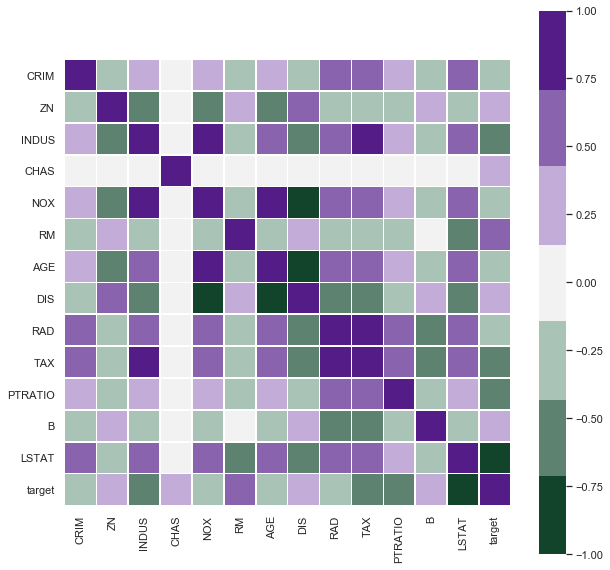

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5)

In [73]:
# Filtrar el dataset mediante un valor de la matriz de correlacion

# Primero declaramos un threshold para la correlacion
corr_th = 0.3

cor = boston_df.corr()
cor_target  = abs(cor["target"])

#Seleccionamos las features mas relevantes
relevant_features = cor_target[cor_target>corr_th]
cols = relevant_features.index.values

# Seleccionamos en nuestro DataFrame las columnas que nos han quedado
boston_df_se_corr = boston_df[cols]
boston_df_se_corr

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,1.0,273.0,21.0,393.45,6.48,22.0
